
# Lab Experiment 1: Cafe Sales Data Cleaning 

### Task 1: Create a Virtual Environment and Install Required Packages
### python -m venv venv
### .\venv\Scripts\activate
### pip install pandas numpy matplotlib seaborn


<!-- # Task 1: Create a Virtual Environment and Install Required Packages
# (Run these commands in your Terminal/PowerShell, not inside Python)
# python -m venv venv
# .\venv\Scripts\activate
# pip install pandas numpy matplotlib seaborn -->


In [56]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Task 2: Load and Inspect the Dataset 

In [57]:
# Load the CSV file
df = pd.read_csv("dirty_cafe_sales.csv")

In [58]:
# Display first 5 rows
print("First 5 Rows:")
print(df.head())


First 5 Rows:
  Transaction ID    Item Quantity Price Per Unit Total Spent  Payment Method  \
0    TXN_1961373  Coffee        2            2.0         4.0     Credit Card   
1    TXN_4977031    Cake        4            3.0        12.0            Cash   
2    TXN_4271903  Cookie        4            1.0       ERROR     Credit Card   
3    TXN_7034554   Salad        2            5.0        10.0         UNKNOWN   
4    TXN_3160411  Coffee        2            2.0         4.0  Digital Wallet   

   Location Transaction Date  
0  Takeaway       2023-09-08  
1  In-store       2023-05-16  
2  In-store       2023-07-19  
3   UNKNOWN       2023-04-27  
4  In-store       2023-06-11  


In [59]:
# Display last 5 rows
print("\nLast 5 Rows:")
print(df.tail())



Last 5 Rows:
     Transaction ID      Item Quantity Price Per Unit Total Spent  \
9995    TXN_7672686    Coffee        2            2.0         4.0   
9996    TXN_9659401       NaN        3            NaN         3.0   
9997    TXN_5255387    Coffee        4            2.0         8.0   
9998    TXN_7695629    Cookie        3            NaN         3.0   
9999    TXN_6170729  Sandwich        3            4.0        12.0   

      Payment Method  Location Transaction Date  
9995             NaN   UNKNOWN       2023-08-30  
9996  Digital Wallet       NaN       2023-06-02  
9997  Digital Wallet       NaN       2023-03-02  
9998  Digital Wallet       NaN       2023-12-02  
9999            Cash  In-store       2023-11-07  


In [60]:
# Display summary info
print("\nData Info:")
df.info()


Data Info:
<class 'pandas.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Transaction ID    10000 non-null  str  
 1   Item              9667 non-null   str  
 2   Quantity          9862 non-null   str  
 3   Price Per Unit    9821 non-null   str  
 4   Total Spent       9827 non-null   str  
 5   Payment Method    7421 non-null   str  
 6   Location          6735 non-null   str  
 7   Transaction Date  9841 non-null   str  
dtypes: str(8)
memory usage: 625.1 KB


In [61]:
df.describe()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
count,10000,9667,9862,9821,9827,7421,6735,9841
unique,10000,10,7,8,19,5,4,367
top,TXN_1961373,Juice,5,3.0,6.0,Digital Wallet,Takeaway,UNKNOWN
freq,1,1171,2013,2429,979,2291,3022,159


# Task 3: Handle Missing Values 

In [62]:
# 1. Identify columns containing missing values
print("Missing Values (Before):")
print(df.isnull().sum())


Missing Values (Before):
Transaction ID         0
Item                 333
Quantity             138
Price Per Unit       179
Total Spent          173
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64


In [63]:

# 2. Fix Data Types First!
# Convert dirty text (like "ERROR") to numbers (NaN)
numeric_cols = ['Quantity', 'Price Per Unit', 'Total Spent']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [64]:


# 3. Handle Numerical columns (Fill with Mean)
for col in numeric_cols:
    mean_val = df[col].mean()
    df[col] = df[col].fillna(mean_val) 

print("\nMissing Values (After Numeric Fill):")
print(df.isnull().sum())



Missing Values (After Numeric Fill):
Transaction ID         0
Item                 333
Quantity               0
Price Per Unit         0
Total Spent            0
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64


In [65]:
# 4. Handle Categorical columns (Fill with "Unknown")
categorical_cols = df.select_dtypes(include=['object', 'string']).columns
for col in categorical_cols:
    df[col] = df[col].fillna('Unknown') 

print("\nMissing Values (After Categorical Fill):")
print(df.isnull().sum())


Missing Values (After Categorical Fill):
Transaction ID      0
Item                0
Quantity            0
Price Per Unit      0
Total Spent         0
Payment Method      0
Location            0
Transaction Date    0
dtype: int64


In [66]:



# 5. Handle Date columns (FIXED FOR NEW PANDAS)
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], errors='coerce')
# Use ffill() instead of fillna(method='ffill')
df['Transaction Date'] = df['Transaction Date'].ffill()

print("\nMissing Values (After Date Fill):")
print(df.isnull().sum())


Missing Values (After Date Fill):
Transaction ID      0
Item                0
Quantity            0
Price Per Unit      0
Total Spent         0
Payment Method      0
Location            0
Transaction Date    0
dtype: int64


#  Task 4: Remove Duplicate Records 

In [67]:


# Identify duplicates
duplicate_count = df.duplicated().sum()
print(f"Duplicate rows found: {duplicate_count}")


Duplicate rows found: 0


In [68]:

# Remove duplicates
df.drop_duplicates(inplace=True)

In [69]:


# Verify removal
print(f"Number of rows after removing duplicates: {len(df)}")

Number of rows after removing duplicates: 10000


#  Task 5: Detect Outliers 

In [70]:


# Select 'Total Spent' for outlier detection
num_col = 'Total Spent'

# Calculate IQR
Q1 = df[num_col].quantile(0.25)
Q3 = df[num_col].quantile(0.75)
IQR = Q3 - Q1

# Determine bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = df[(df[num_col] < lower_bound) | (df[num_col] > upper_bound)]

print(f"Number of outliers in '{num_col}': {len(outliers)}")

Number of outliers in 'Total Spent': 259


In [71]:

print("\nOutlier Records (First 5):")
print(outliers.head())



Outlier Records (First 5):
    Transaction ID     Item  Quantity  Price Per Unit  Total Spent  \
10     TXN_2548360    Salad       5.0             5.0         25.0   
51     TXN_6342161    Salad       5.0             5.0         25.0   
52     TXN_8914892  UNKNOWN       5.0             5.0         25.0   
96     TXN_5220895    Salad       5.0             5.0         25.0   
100    TXN_9517146  Unknown       5.0             5.0         25.0   

     Payment Method  Location Transaction Date  
10             Cash  Takeaway       2023-11-07  
51            ERROR  Takeaway       2023-01-08  
52   Digital Wallet   Unknown       2023-03-15  
96             Cash  In-store       2023-06-10  
100            Cash  Takeaway       2023-10-30  


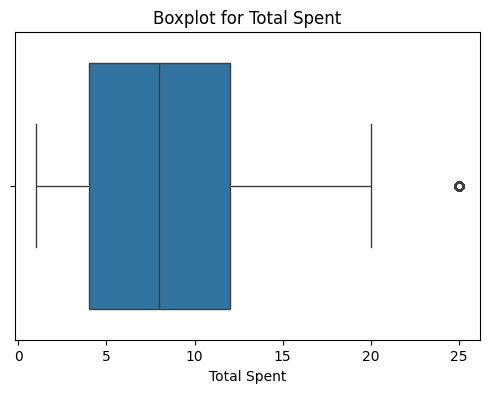

In [72]:

# Visualisation (Boxplot)
plt.figure(figsize=(6, 4))
sns.boxplot(x=df[num_col])
plt.title(f'Boxplot for {num_col}')
plt.show()